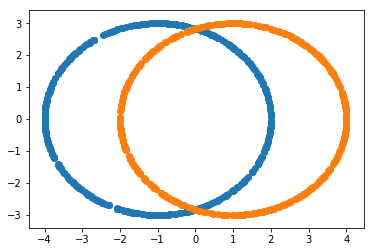

In [244]:
import numpy as np
import matplotlib.pyplot as plt

x0,y0,x1,y1 = -1,0,1,0
r1,r2 = 3,3

n_p = 500
phi1 = np.random.rand(n_p)*np.pi*2
phi2 = np.random.rand(n_p)*np.pi*2
p1 = np.array([r1*np.cos(phi1)+x0,r1*np.sin(phi1)+y0])
p2 = np.array([r2*np.cos(phi2)+x1,r2*np.sin(phi2)+y1])
plt.scatter(p1[0],p1[1])
plt.scatter(p2[0],p2[1])

# The model: circles, not know: center, radius

#r10,r20,x00,x10,y00,y10 = np.random.rand(6)
r10,r20,x00,x10,y00,y10 = 3,3,-1,0,1,0
radius = 0.1
x_p = np.concatenate([p1[0],p2[0]])
y_p = np.concatenate([p1[1],p2[1]])

def prob(x,y,x_c,y_c,r_):
    r = np.sqrt((x-x_c)**2+(y-y_c)**2)
    return np.e**(-(r-r_)**2/(2*radius**2))

def iterate0(x0,y0,x1,y1,r1,r2):
    prob1 = prob(x0,y0,x_p,y_p,r1)
    prob2 = prob(x1,y1,x_p,y_p,r2)
    prob_sum = prob1+prob2
    prob1 = prob1/prob_sum
    #print(prob1)
    prob2 = prob2/prob_sum
    #print(prob2)
    x01 = np.sum(prob1*x_p)/np.sum(prob1)
    y01 = np.sum(prob1*y_p)/np.sum(prob1)
    r11 = np.sum(prob1*np.sqrt((x_p-x01)**2+(y_p-y01)**2))/np.sum(prob1)
    x11 = np.sum(prob2*x_p)/np.sum(prob2)
    y11 = np.sum(prob2*y_p)/np.sum(prob2)
    r21 = np.sum(prob2*np.sqrt((x_p-x11)**2+(y_p-y11)**2))/np.sum(prob2)
    return x01,y01,x11,y11,r11,r21

In [245]:
for i in range(1000):
    #print(x00,y00,x10,y10,r10,r20)
    x00,y00,x10,y10,r10,r20 = iterate0(x00,y00,x10,y10,r10,r20);

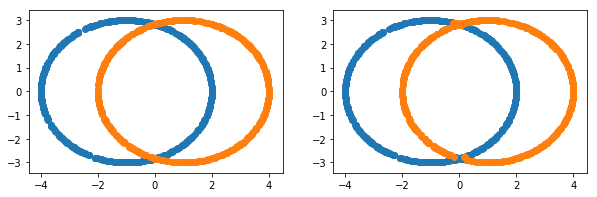

In [246]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.scatter(p1[0],p1[1])
plt.scatter(p2[0],p2[1])

plt.subplot(1,2,2)
prob1 = prob(x_p,y_p,x00,y00,r10)
prob2 = prob(x_p,y_p,x10,y10,r20)
boo = prob1>prob2
plt.scatter(x_p[boo],y_p[boo])
plt.scatter(x_p[~boo],y_p[~boo])